In [1]:
import pandas as pd
import os
import json


# Analysis on data dump
This notebook is to learn reading data dumps directly form the server (Rnd2) as opposed to obtain the data through API calls

Recent data dump with normalized lang tags produced at the end of June 2022 for the project Etranslate

In [167]:
#data dump location
data_path="/projects/etranslate-data-dump"

In [168]:
!pwd

/home/pscalia/git/rd-europeana-translate/data_analysis/from_datadump


In [171]:
#listing files in directory
list_data_files=os.listdir(data_path)

In [165]:
#locating zip file. Each zip file  contains a collection
file_name = os.path.join(data_path,  list_data_files[2])
file_name

'/projects/etranslate-data-dump/00719.zip'

In [3]:
file='bilingual.json'

In [60]:
  
# Opening JSON file
f = open(file)
  
# returns JSON object 
data = json.load(f)
length_en_metadata=[]
iter_bil_same=0
iter_bil_not_same=0
for i in data['en-es']:
    if i['en']==i['es']:
        iter_bil_same=iter_bil_same+1
    else:
        length_en_metadata.append(len(i['en'].split()))
        iter_bil_not_same=iter_bil_not_same+1  

#Closing file
f.close()

In [66]:
import matplotlib.pyplot as plt

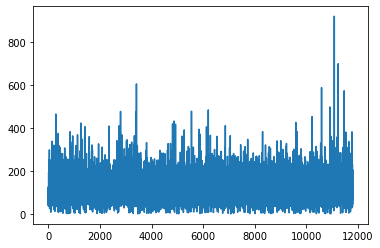

In [68]:
plt.plot(length_en_metadata);

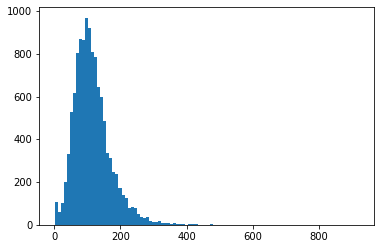

In [96]:
plt.hist(length_en_metadata,bins=100);

In [69]:
import numpy as np

In [90]:
n_less_equal_five_words=0
n_more_than_five_words=0
for item in length_en_metadata:
    if n_less_equal_five_words<=5:
        n_less_equal_five_words+=1
    else:
        n_more_than_five_words+=1
            

In [91]:
n_less_equal_five_words

6

In [92]:
n_more_than_five_words

11787

In [93]:
np.mean(length_en_metadata)

114.92427711354193

In [97]:
data['en-es']

[{'en': 'This erratum relates to our work “Fundamental groups of some special quadric arrangements”. The original Theorems 2.2, 2.5, 2.8 and Propositions 2.3(ii)(iii), 2.6(ii)(iii), 2.9(ii)(iii) have wrong results. They need to be rephrased. Corollaries 2.4 and 2.7 are incomplete, and they are extended. We add a new Corollary 2.10, which does not appear in the original paper. Proposition 3.1 has a wrong result and it is rephrased and reproved. In Proposition 4.1 and its Corollary 4.2 a slight error has occurred: as the correct proofs in the paper show, the monodromy is a quadruple fulltwist.',
  'es': 'This erratum relates to our work “Fundamental groups of some special quadric arrangements”. The original Theorems 2.2, 2.5, 2.8 and Propositions 2.3(ii)(iii), 2.6(ii)(iii), 2.9(ii)(iii) have wrong results. They need to be rephrased. Corollaries 2.4 and 2.7 are incomplete, and they are extended. We add a new Corollary 2.10, which does not appear in the original paper. Proposition 3.1 has 

In [94]:
length_en_metadata.hist()

AttributeError: 'list' object has no attribute 'hist'

In [4]:
#use beaut soup for parsing xml
soup = BeautifulSoup(file, 'xml')

/home/pscalia/anaconda3/envs/python_wrap/lib/python3.9/site-packages/bs4/__init__.py:346: MarkupResemblesLocatorWarning: "bilingual.json" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [19]:
#finding all description tag
t=soup.find('description')

In [22]:
t.text

'Kontext: Hauptstaatsarchiv/Archivdirektion Stuttgart: Sachverständigenkommission Landesname, Landeswappen, Landesfarben von Baden-Württemberg&gt;&gt; 2. Entwürfe und Gutachten der Staatsarchive &gt;&gt; Entwürfe des Hauptstaatsarchivs Stuttgart für das Landeswappen, insbesondere auf der Grundlage der Wappen von Baden, Württemberg und dem Herzogtum Schwaben'

In [11]:
# find attributes of title
t.attrs

{}

# Experiment 1: extract all german text

In [172]:
listOfFileNames

['0010004a02.xml',
 '0010005a01.xml',
 '0010008a01.xml',
 '0010012a02.xml',
 '0010015a02.xml',
 '0010019a03.xml',
 '0010021a02.xml',
 '0010022a01.xml',
 '0010022a02.xml',
 '0010022a04.xml',
 '0010037.xml',
 '0010037a01.xml',
 '0010037a03.xml',
 '0010055.xml',
 '0010056.xml',
 '0010060a01.xml',
 '0010074a01.xml',
 '0010074a02.xml',
 '0010075a05.xml',
 '0010075a06.xml',
 '0010077a01.xml',
 '0010081.xml',
 '0010081a04.xml',
 '0010082.xml',
 '0010082a01.xml',
 '0010084a04.xml',
 '0010085a03.xml',
 '0010085a08.xml',
 '0010087a02.xml',
 '0010088a11.xml',
 '0010091.xml',
 '0010157a02.xml',
 '0010157a09.xml',
 '0010157a21.xml',
 '0010157a22.xml',
 '0010157a32.xml',
 '0010159a02.xml',
 '0010160a01.xml',
 '0010161a01.xml',
 '0010161a02.xml',
 '0010162.xml',
 '0010163a02.xml',
 '0010163a04.xml',
 '0010164a01.xml',
 '0010165a01.xml',
 '0010165a02.xml',
 '0010165a03.xml',
 '0010165a06.xml',
 '0010166a32.xml',
 '0010166a45.xml',
 '0010166a55.xml',
 '0010167a01.xml',
 '0010168a01.xml',
 '0010168a02.x

In [ ]:
with ZipFile(file_name, 'r') as zipObject:
 listOfFileNames = zipObject.namelist()
 for fileName in listOfFileNames:
        if os.path.isfile(fileName):
           # Extract a single file from zip
            print('file already exist')
            print(fileName)
        else:
            zipObject.extract(fileName)
            print('file extracted')
            

In [148]:
def read_single_collection(listOfFileNames, field):
    lang_tags=[]
    for filename in listOfFileNames:
        with open(filename, 'r') as f:
            file = f.read() 
        soup = BeautifulSoup(file, 'xml')
        t=soup.find(f'{field}')
        lang=t.get('xml:lang')
        if lang:
            lang_tags.append(lang)
    return lang_tags

In [166]:
list_data_files=os.listdir(data_path) #list of zip files
for zip_file in list_data_files:
    file_name = os.path.join(data_path,  zip_file) #name of zip file
    print(file_name)
    with ZipFile(file_name, 'r') as zipObject:
        listOfFileNames = zipObject.namelist()
        for fileName in listOfFileNames:
                if os.path.isfile(fileName):
                   # Extract a single file from zip
                   print('file exists')
                   os.remove(fileName)  
                else:
                    pass
         
        
                
                #     extracted_file=zipObject.extract(fileName)
                #     print('file extracted')
                #     with open( extracted_file, 'r') as f:
                #         file = f.read() 
                #     soup = BeautifulSoup(file, 'xml')
                #     t=soup.find('description')
                #     print(t.get('xml:lang'))
                #     print('file extracted')

/projects/etranslate-data-dump/00101.zip
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists
file exists

KeyboardInterrupt: 

In [ ]:
for values in soup.findAll("time"):
    print("{} : {}, {}°".format(values["from"], values.find("symbol")["name"], values.fin

In [127]:
with open('plink__f_1_100568.xml', 'r') as f:
    file = f.read() 
soup = BeautifulSoup(file, 'xml')
t=soup.find('description')
t.get('xml:lang')



'de'

bs4.BeautifulSoup

In [23]:
file_name = os.path.join(data_path,  list_data_files[2])

In [ ]:
with ZipFile(file_name, 'r') as zipObject:
    listOfFileNames = zipObject.namelist()
 for fileName in listOfFileNames:
        if os.path.isfile(fileName):
           # Extract a single file from zip
            print('file already exist')
        else:
            data=zipObject.extract(fileName)
            print('file extracted')

In [13]:
#alternative to find keyword in file?
keyword = 'your_keyword'
for file in files:
    if os.path.isfile(os.path.join(your_path, file)):
        f = open(os.path.join(your_path, file),'r')
        for x in f:
            if keyword in x:
                #do what you want
        f.close()

IndentationError: expected an indented block (1226324488.py, line 9)